In [ ]:
!pip install perfplot
!pip install --upgrade "jax[cpu]"

In [ ]:
# NVIDIA GPU JAX Installation
# !pip install --upgrade pip
# CUDA 12 installation
# Note: wheels only available on linux.
# !pip install --upgrade "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import jax 
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")
import torch
torch.set_default_tensor_type(torch.DoubleTensor)
torch.set_default_dtype(torch.float64)

In [ ]:
import os
NUM_THREADS = os.cpu_count()
torch.set_num_threads(NUM_THREADS)

In [ ]:
import perfplot

perfplot.show(
    setup=lambda n: [np.random.rand(n, n), np.random.rand(n,n),
                    jax.random.uniform(jax.random.PRNGKey(42), (n,n)),jax.random.uniform(jax.random.PRNGKey(42), (n,)),
                    torch.rand(n,n), torch.rand(n,n)] ,
    kernels=[
        lambda data: np.dot( data[0], data[1]),
        lambda data: jnp.dot( data[2], data[3]),
        lambda data: torch.matmul( data[4], data[5]),
    ],
    title="Matrix multiplication",
    labels=["Numpy", "Jax", "Torch"],
    n_range=[2 ** k for k in range(12)],
    xlabel="len(a)",
    equality_check=False,
)

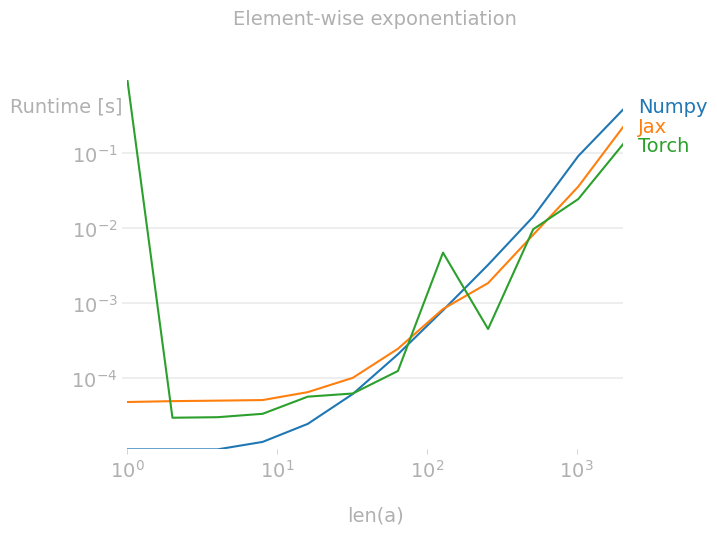

In [10]:
import perfplot
perfplot.show(
    setup=lambda n: [np.random.rand(n, n),
                     jax.random.uniform(jax.random.PRNGKey(42), (n,n)),
                    torch.rand(n,n)] ,
    kernels=[
        lambda data: np.exp( data[0] ),
        lambda data: jnp.exp( data[1] ),
        lambda data: torch.exp( data[2] ),
    ],
    title="Element-wise exponentiation",
    labels=["Numpy", "Jax", "Torch"],
    n_range=[2 ** k for k in range(12)],
    xlabel="len(a)",
    equality_check=False,
)

In [ ]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import cg as cg_sp

#### With no limit to number of iterative inversions

In [ ]:
import perfplot
perfplot.show(
    setup=lambda n: [np.random.rand(n, n), np.random.rand(n),
                     jax.random.uniform(jax.random.PRNGKey(42), (n,n)) ,jax.random.uniform(jax.random.PRNGKey(42), (n,))], 
    kernels=[
        lambda data: cg_sp( data[0], data[1],  atol = 1e-10 ),
        lambda data: jax.scipy.sparse.linalg.cg( data[2], data[3], atol = 1e-10 ),
    ],
    title="Conjugate Gradient",
    labels=["Scipy CG", "Jax CG"],  
    n_range=[2 ** k for k in range(12)],
    xlabel="len(a)",
    equality_check=False,
)

#### With limited iterative inversions

In [ ]:
import perfplot
perfplot.show(
    setup=lambda n: [np.random.rand(n, n), np.random.rand(n),
                     jax.random.uniform(jax.random.PRNGKey(42), (n,n)) ,jax.random.uniform(jax.random.PRNGKey(42), (n,))], 
    kernels=[
        lambda data: cg_sp( data[0], data[1], maxiter= 30, atol = 1e-10 ),
        lambda data: jax.scipy.sparse.linalg.cg( data[2], data[3], maxiter = 30,  atol = 1e-10 ),
    ],
    title="Conjugate Gradient",
    labels=["Scipy CG", "Jax CG"],  
    n_range=[2 ** k for k in range(12)],
    xlabel="len(a)",
    equality_check=False,
)